In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import power_anova 

In [3]:
#data prep 

data = pd.read_csv('PTSD_filtered.csv')

## to create a varaible for age at sefla and consequently create a binary varaiable for young or not
data['dob'] = pd.to_datetime(data['dob'])
data['date'] = pd.to_datetime(data['date'])
data['age_at_sefla'] = None

for idx, row in data.iterrows():
    if row['day'] == 'sefla':
        data.at[idx, 'age_at_sefla'] = (row['date'] - row['dob']).days / 7
    else:
        sefla_row = data[(data['cohort_id'] == row['cohort_id']) & (data['day'] == 'sefla')]
        if not sefla_row.empty:
            data.at[idx, 'age_at_sefla'] = sefla_row.iloc[0]['age_at_sefla']

data['age_at_sefla'] = data['age_at_sefla'].astype(float)

data['young'] = (data['age_at_sefla'] < 12).astype(str)

## subsetting data
subset_data = data[(data['day'] != 'sefla') & (data['day'] != 'recall5')]
experimental_group = subset_data[subset_data['condition'] == 'sefl']
control_group = subset_data[subset_data['condition'] == 'control']
sefla_data = data[data['day'] == 'sefla']
experimental_group_sefla = data[(data['day'] == 'sefla') & (data['condition'] == 'sefl')]
control_group_sefla = data[(data['day'] == 'sefla') & (data['condition'] == 'control')]
male_data = subset_data[subset_data['sex'] == 'male']
female_data = subset_data[subset_data['sex'] == 'female']
male_data_sefla = data[(data['day'] == 'sefla') & (data['sex'] == 'male')]
female_data_sefla = data[(data['day'] == 'sefla') & (data['sex'] == 'female')]
old_data = subset_data[subset_data['young'] == 'False']
young_data = subset_data[subset_data['young'] == 'True']
old_data_sefla = data[(data['day'] == 'sefla') & (data['young'] == 'False')]
young_data_sefla = data[(data['day'] == 'sefla') & (data['young'] == 'True')]

/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_62225/674333112.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dob'] = pd.to_datetime(data['dob'])
/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_62225/674333112.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


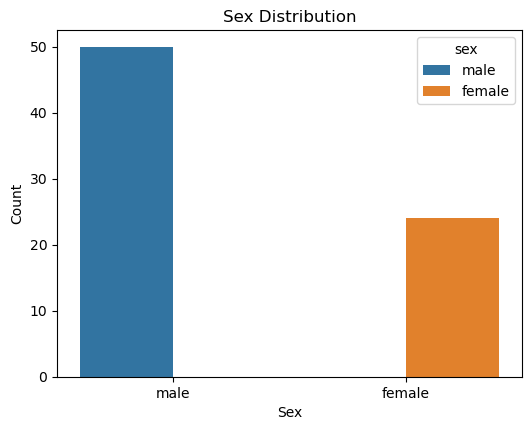

In [4]:
#figure 1a
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="sex", hue="sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.savefig('figure_1a_sex_dist.svg', format='svg')

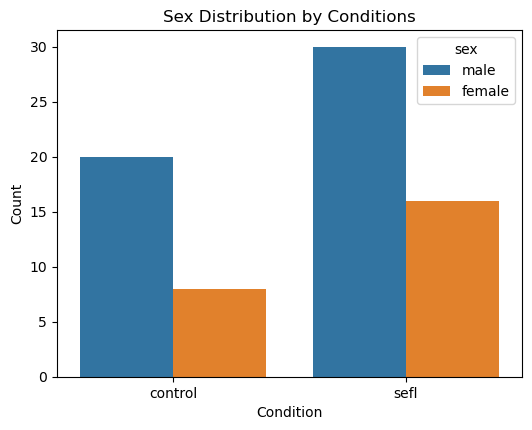

In [5]:
#figure 1b
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="condition", hue="sex")
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Sex Distribution by Conditions')
plt.savefig('figure_1b_sex_dist_cond.svg', format='svg')

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


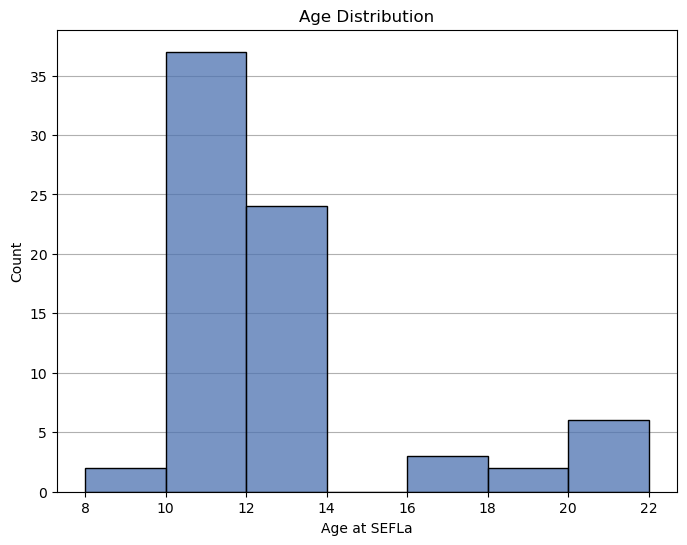

In [6]:
#figure 1c
# Plot the combined histogram and KDE plot
bins = [8, 10, 12, 14, 16, 18, 20, 22]
plt.figure(figsize=(8, 6))
sns.histplot(data[data['day'] == 'sefla']['age_at_sefla'], bins=bins, color="#4c72b0", zorder=2)
plt.xlabel('Age at SEFLa')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='-', zorder=1)  # Optional: Customize the style of the horizontal line
plt.grid(axis='x', color='none')  # Remove vertical grid lines
plt.savefig('figure_1c_age_hist.svg', format='svg')
plt.show()

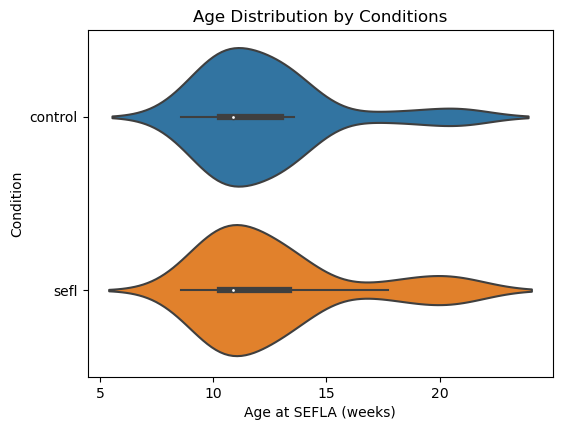

In [7]:
#figure 1d
plt.figure(figsize=(6, 4.5))
sns.violinplot(data=data[data['day'] == 'sefla'], x='age_at_sefla', y='condition')
plt.xlabel('Age at SEFLA (weeks)')
plt.ylabel('Condition')
plt.xticks(ticks=range(5, int(data['age_at_sefla'].max()) + 5, 5))
plt.title('Age Distribution by Conditions')
plt.savefig('figure_1d_age_cond.svg', format='svg')

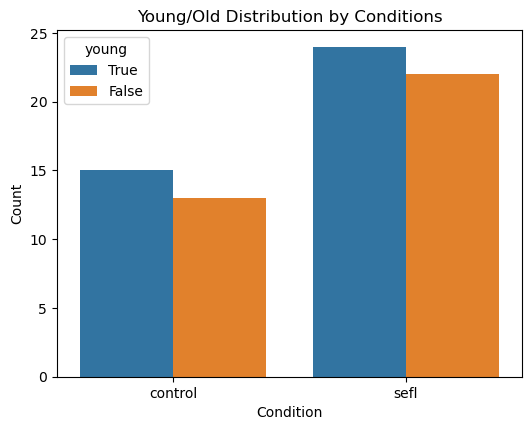

In [8]:
#figure 1e
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="condition", hue="young")
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Young/Old Distribution by Conditions')
plt.savefig('figure_1e_young_cond.svg', format='svg')

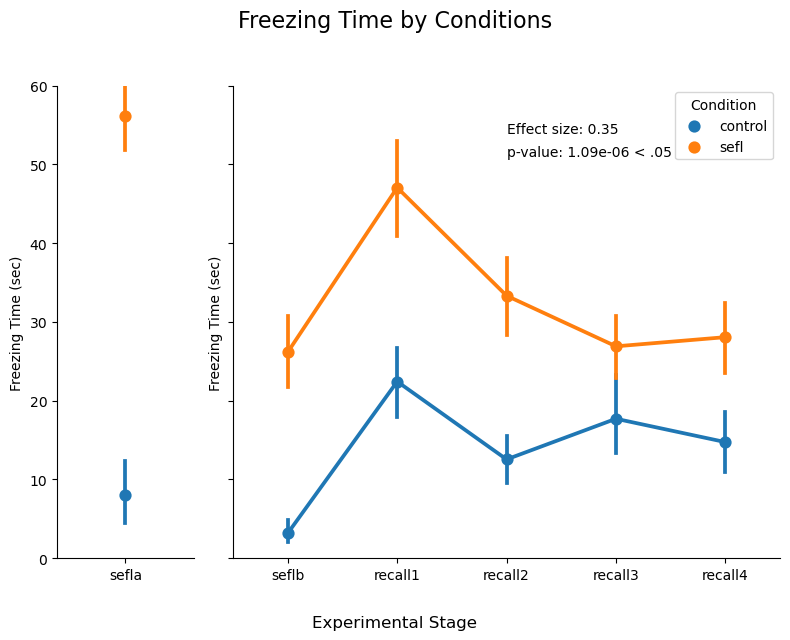

In [10]:
#figure 2a

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis
sns.pointplot(ax=ax1, data=sefla_data, x='day', y='freezing', hue='condition', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
# ax1.set_title('Freezing Time for sefla', fontsize=10, x=0.6)
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis
sns.pointplot(ax=ax2, data=subset_data, x='day', y='freezing', hue='condition', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
# ax2.set_title('Freezing Time by Conditions')
ax2.legend(title='Condition')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Conditions', fontsize=16, x=0.5)
# fig.set_xlabel('Experimental Stage')
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.353210
pvalue = 1.093325e-06
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_2a_freezing_cond.svg', format='svg')
plt.show()


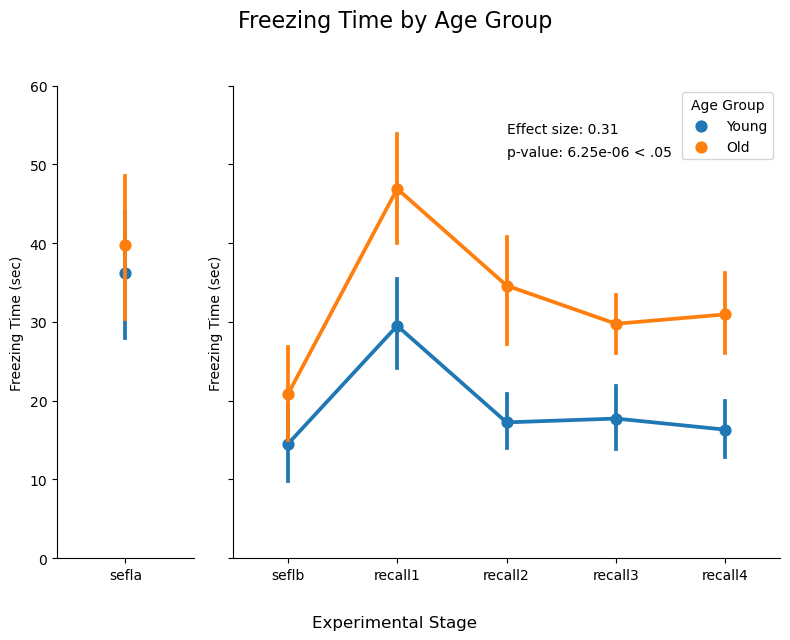

In [11]:
# Figure 2b
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for age comparison
sns.pointplot(ax=ax1, data=sefla_data, x='day', y='freezing', hue='young', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for age comparison
sns.pointplot(ax=ax2, data=subset_data, x='day', y='freezing', hue='young', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=['Young', 'Old'], title='Age Group')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Age Group', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.312284
pvalue = 6.249053e-06
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_2b_freezing_age.svg', format='svg')
plt.show()

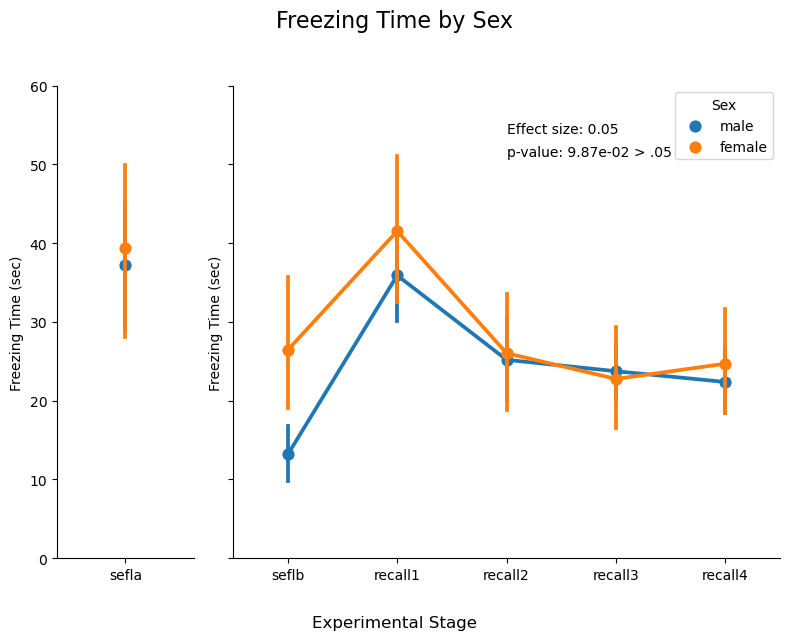

In [12]:
# Figure 2c
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for sex comparison
sns.pointplot(ax=ax1, data=sefla_data, x='day', y='freezing', hue='sex', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for sex comparison
sns.pointplot(ax=ax2, data=subset_data, x='day', y='freezing', hue='sex', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
ax2.legend(title='Sex')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Sex', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.048790
pvalue = 9.870660e-02
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_2c_freezing_sex.svg', format='svg')
plt.show()

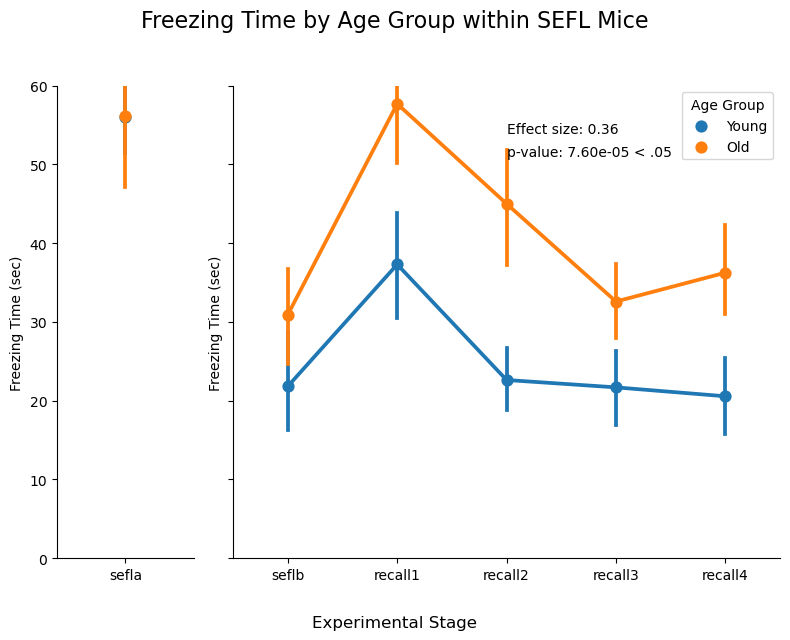

In [13]:
# Figure 3a
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for age comparison within SEFL mice
sns.pointplot(ax=ax1, data=experimental_group_sefla, x='day', y='freezing', hue='young', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for age comparison within SEFL mice
sns.pointplot(ax=ax2, data=experimental_group, x='day', y='freezing', hue='young', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=['Young', 'Old'], title='Age Group')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Age Group within SEFL Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.356433
pvalue = 7.599005e-05
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_3a_freezing_age_sefl.svg', format='svg')
plt.show()

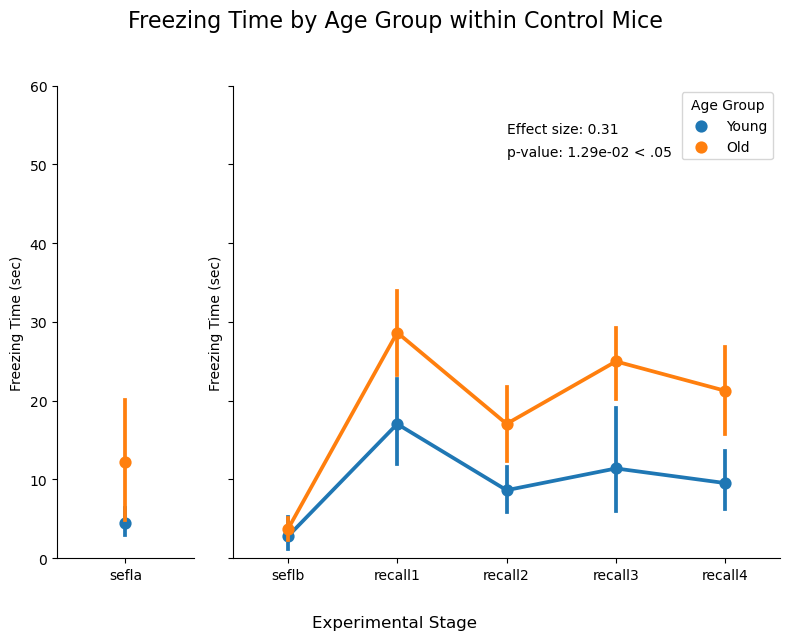

In [14]:
# Figure 3b
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for age comparison within control mice
sns.pointplot(ax=ax1, data=control_group_sefla, x='day', y='freezing', hue='young', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for age comparison within control mice
sns.pointplot(ax=ax2, data=control_group, x='day', y='freezing', hue='young', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=['Young', 'Old'], title='Age Group')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Age Group within Control Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.312203
pvalue = 1.289142e-02
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_3b_freezing_age_control.svg', format='svg')
plt.show()

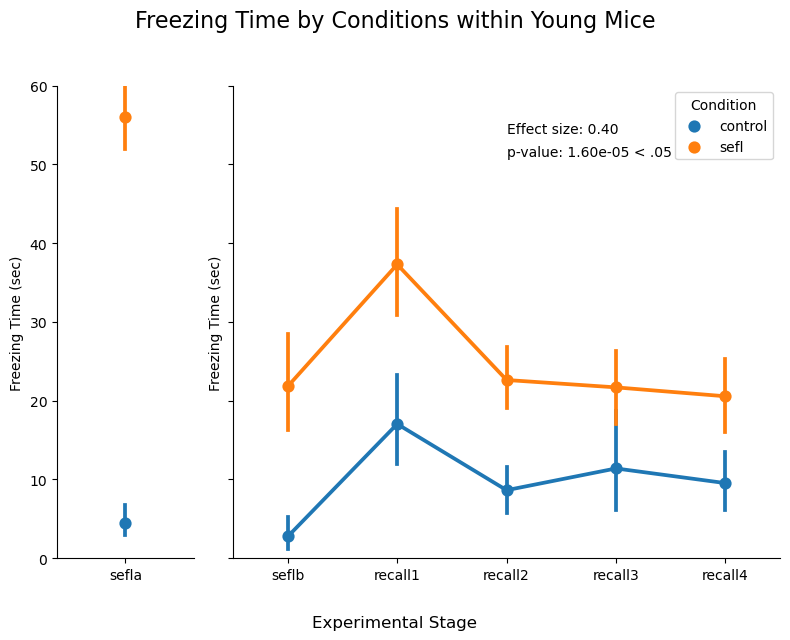

In [15]:
# Figure 3c
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for condtion comparison within young mice
sns.pointplot(ax=ax1, data=young_data_sefla, x='day', y='freezing', hue='condition', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for condition comparison within young mice
sns.pointplot(ax=ax2, data=young_data, x='day', y='freezing', hue='condition', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
ax2.legend(title='Condition')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Conditions within Young Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.399364
pvalue = 1.596238e-05
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_3c_freezing_condition_young.svg', format='svg')
plt.show()

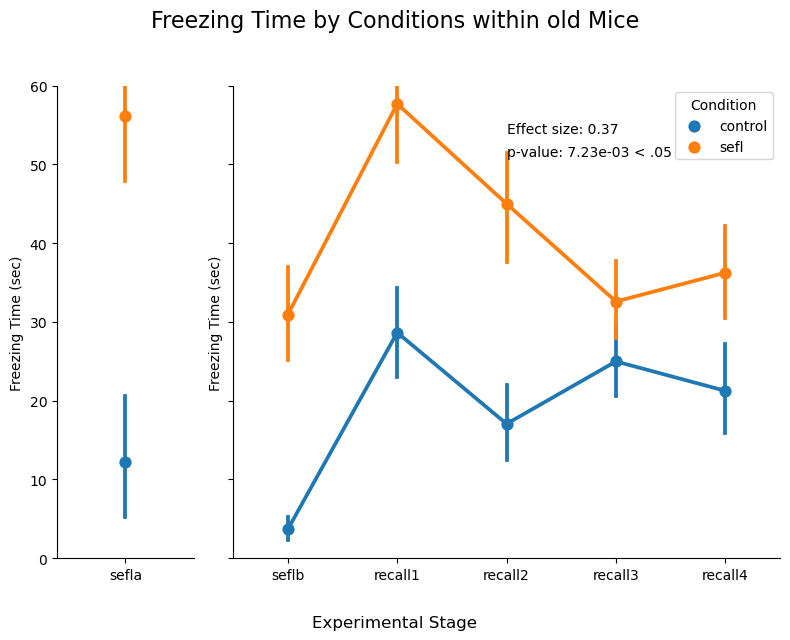

In [16]:
# Figure 3d
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for condition comparison within old mice
sns.pointplot(ax=ax1, data=old_data_sefla, x='day', y='freezing', hue='condition', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for condition comparison within old mice
sns.pointplot(ax=ax2, data=old_data, x='day', y='freezing', hue='condition', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
ax2.legend(title='Condition')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Conditions within old Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.371648
pvalue = 7.230362e-03
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_3d_freezing_condition_old.svg', format='svg')
plt.show()

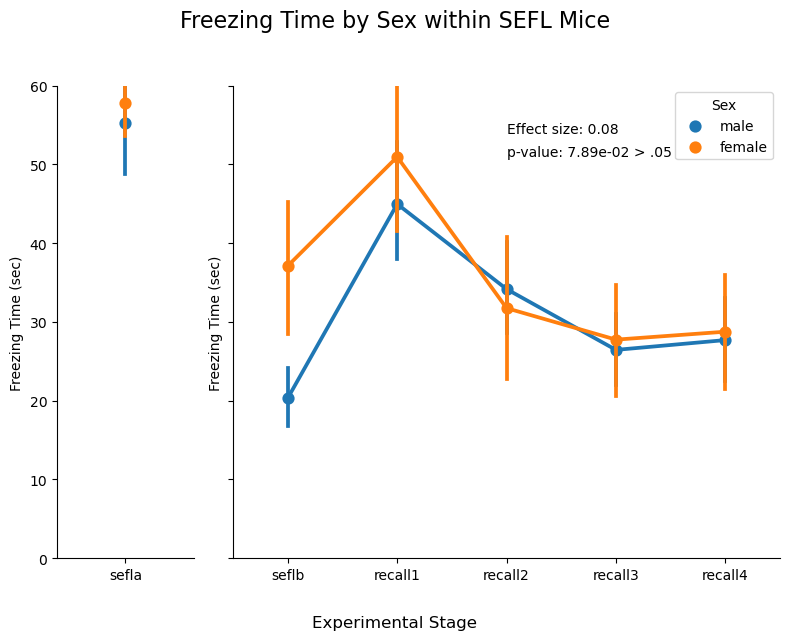

In [17]:
# Figure 4a
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for sex comparison within SEFL mice
sns.pointplot(ax=ax1, data=experimental_group_sefla, x='day', y='freezing', hue='sex', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for sex comparison within SEFL mice
sns.pointplot(ax=ax2, data=experimental_group, x='day', y='freezing', hue='sex', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
ax2.legend(title='Sex')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Sex within SEFL Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.083276
pvalue = 7.890522e-02
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_4a_freezing_sex_sefl.svg', format='svg')
plt.show()

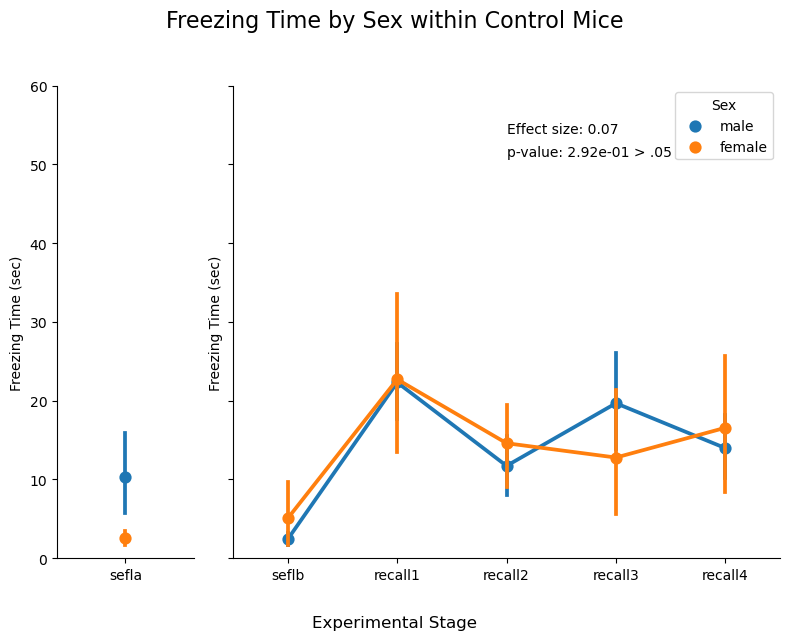

In [18]:
# Figure 4b
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for sex comparison within control mice
sns.pointplot(ax=ax1, data=control_group_sefla, x='day', y='freezing', hue='sex', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for sex comparison within control mice
sns.pointplot(ax=ax2, data=control_group, x='day', y='freezing', hue='sex', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
ax2.legend(title='Sex')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Sex within Control Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.065058
pvalue = 2.919367e-01
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_4b_freezing_sex_control.svg', format='svg')
plt.show()

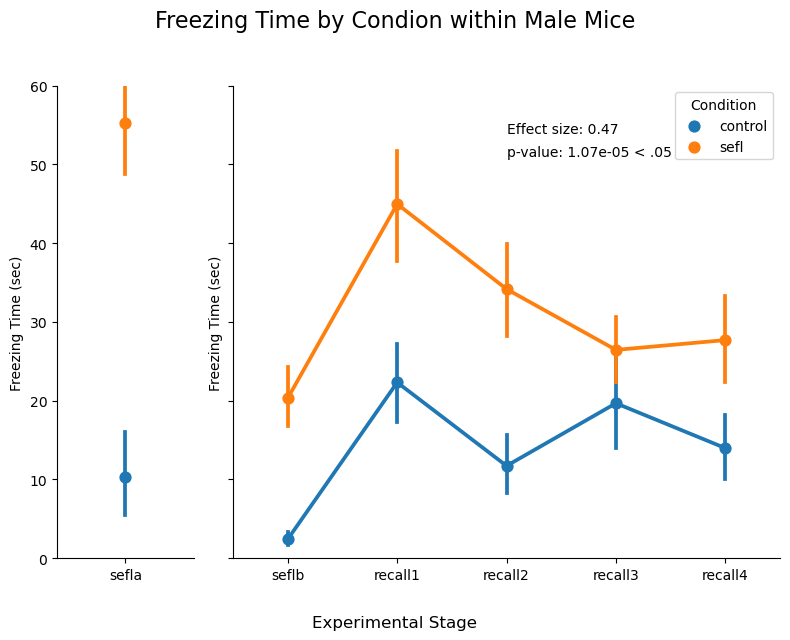

In [19]:
# Figure 4c
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for condition comparison within male mice
sns.pointplot(ax=ax1, data=male_data_sefla, x='day', y='freezing', hue='condition', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for condition comparison within male mice
sns.pointplot(ax=ax2, data=male_data, x='day', y='freezing', hue='condition', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
ax2.legend(title='Condition')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Condion within Male Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.470053
pvalue = 1.067778e-05
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} < .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_4c_freezing_condition_male.svg', format='svg')
plt.show()

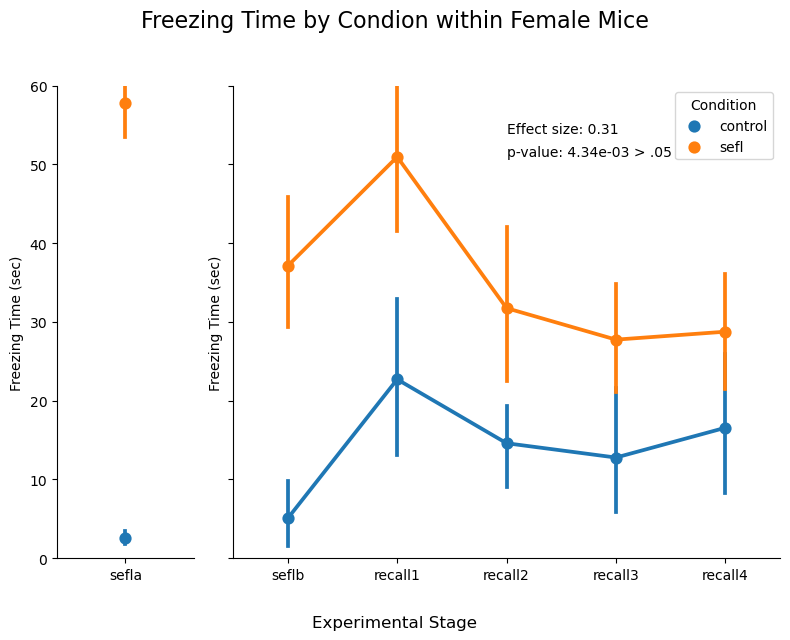

In [20]:
# Figure 4d
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True, gridspec_kw={'width_ratios': [1, 4]})

# Plot the sefla data on the first axis for sex comparison within SEFL mice
sns.pointplot(ax=ax1, data=female_data_sefla, x='day', y='freezing', hue='condition', join=True)
ax1.set_ylabel('Freezing Time (sec)')
ax1.set_ylim([0, 60])
ax1.set_xlabel('')
ax1.legend().remove()
sns.despine(ax=ax1)

# Plot the non-sefla data on the second axis for sex comparison within SEFL mice
sns.pointplot(ax=ax2, data=female_data, x='day', y='freezing', hue='condition', join=True)
ax2.set_xlabel('')
ax2.set_ylabel('Freezing Time (sec)')
ax2.legend(title='Condition')
sns.despine(ax=ax2)

# Add main title
fig.suptitle('Freezing Time by Condion within Female Mice', fontsize=16, x=0.5)

# Add a single x-label for the entire figure
fig.text(0.5, -0.05, 'Experimental Stage', ha='center', fontsize=12)

# Add effect size and p-value annotation
effect_size = 0.314840
pvalue = 4.336248e-03
plt.text(0.5, 0.9, f"Effect size: {effect_size:.2f}", transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f"p-value: {pvalue:.2e} > .05", transform=plt.gca().transAxes)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.savefig('figure_4d_freezing_condition_female.svg', format='svg')
plt.show()

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0.5, 1, 'Kernel Density Estimation Freezing vs. Age by Sex')

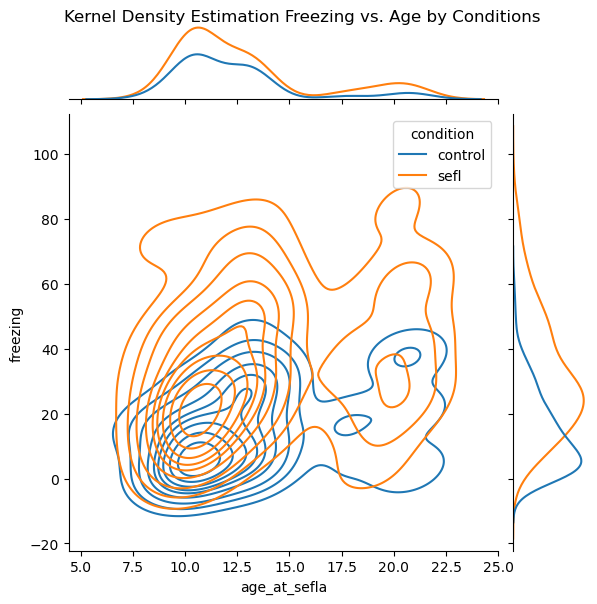

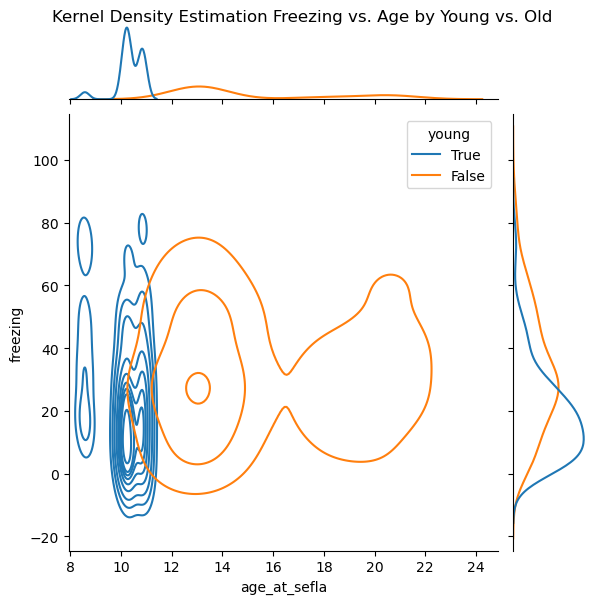

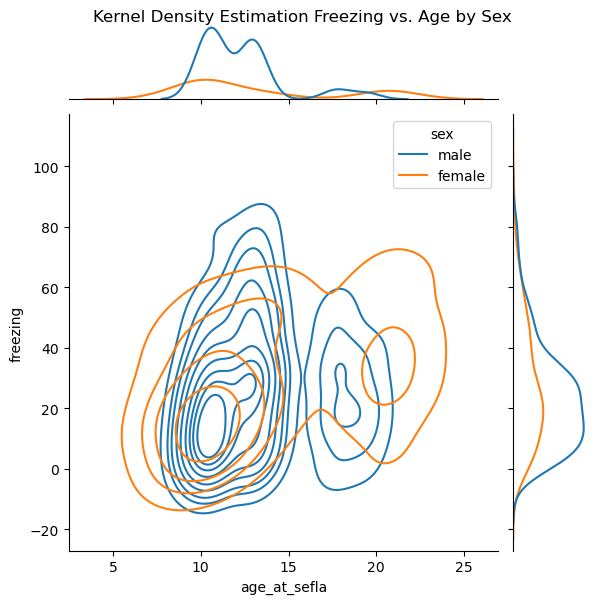

In [30]:
# additional plots 
sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="condition",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Conditions', y=1)

sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="young",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Young vs. Old', y=1)

sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="sex",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Sex', y=1)
